Using Xlense from FieldLensing with SphereTransforms for XFields
==========

In [1]:
import FFTW
FFTW.set_num_threads(5)
import FFTransforms
using FFTransforms: r𝕎, 𝕀, ⊗, ordinary_scale

using Spectra
using XFields
using FieldLensing
using SphereTransforms

using SparseArrays
using LinearAlgebra
using LBblocks: @sblock
using PyPlot
using BenchmarkTools

Set the Xfield transform
----------

In [2]:
trn = @sblock let T=Float64, Nside=1024 # 2048 # 1024
    spin = 0
    𝕊(T, 2*Nside, spin)
end

SphereTransforms.𝕊{Float64}(2048, 4095, 0)

In [3]:
@show Δθarcmin = Δθ′(trn)
@show Δφarcmin = Δφ′(trn);

Δθarcmin = Δθ′(trn) = 5.2734375
Δφarcmin = Δφ′(trn) = 5.2747252747252755


In [4]:
l, m, b = lm(trn)

([0 1 … 2047 2047; 1 2 … 0 0; … ; 2046 2047 … 0 0; 2047 0 … 0 0], [0 -1 … -2047 2047; 0 -1 … 0 0; … ; 0 -1 … 0 0; 0 0 … 0 0], Bool[1 1 … 1 1; 1 1 … 0 0; … ; 1 1 … 0 0; 1 0 … 0 0])

In [5]:
l

2048×4095 Array{Int64,2}:
    0     1     1     2     2     3  …  2045  2045  2046  2046  2047  2047
    1     2     2     3     3     4     2046  2046  2047  2047     0     0
    2     3     3     4     4     5     2047  2047     0     0     0     0
    3     4     4     5     5     6        0     0     0     0     0     0
    4     5     5     6     6     7        0     0     0     0     0     0
    5     6     6     7     7     8  …     0     0     0     0     0     0
    6     7     7     8     8     9        0     0     0     0     0     0
    7     8     8     9     9    10        0     0     0     0     0     0
    8     9     9    10    10    11        0     0     0     0     0     0
    9    10    10    11    11    12        0     0     0     0     0     0
    ⋮                             ⋮  ⋱           ⋮                    
 2039  2040  2040  2041  2041  2042        0     0     0     0     0     0
 2040  2041  2041  2042  2042  2043  …     0     0     0     0     0     0
 20

In [6]:
m

2048×4095 Array{Int64,2}:
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6  …  2045  -2046  2046  -2047  2047
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6     2045  -2046  2046      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6     2045      0     0      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6        0      0     0      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6        0      0     0      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6  …     0      0     0      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6        0      0     0      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6        0      0     0      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6        0      0     0      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6        0      0     0      0     0
 ⋮                 ⋮                ⋮      ⋱     ⋮                      
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6        0      0     0      0     0
 0  -1  1  -2  2  -3  3  -4  4  -5  5  -6  …     0    

In [7]:
# `b` is a BitArray corresponding to which entires of the lm array are used.
b

2048×4095 BitArray{2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱        ⋮              ⋮           
 1  1  1  1  1  1  1  1  1  1  1  1  1     0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  … 

Compute the spectral matrices which mimic CMB tempurature and lesing potential
------------------------------

In [8]:
Ct, Cϕ = @sblock let trn
    l, m, b   = lm(trn)

    cϕl = Spectra.cϕl_approx.(l)

    cTl = Spectra.cTl_approx.(l)
    #cTl = Spectra.cTl_besselj_approx.(l)
    #cTl = Spectra.cTl_matern_cov_approx.(l)
    cTl .*= Spectra.knee.(l; ell=50, alpha=2)
    cTl[l .< 2] .= 0
    cTl[.!b]    .= 0

    cϕl[l .< 2] .= 0
    cϕl[.!b]    .= 0

    Ct  = DiagOp(Xfourier(trn, cTl))
    Cϕ  = DiagOp(Xfourier(trn, cϕl))

    Ct, Cϕ
end;

Simulate T and ϕ fields
---------------

In [9]:
T, ϕ = @sblock let trn, Ct, Cϕ
    zTlm = white_noise_lm(trn)
    zϕlm = white_noise_lm(trn)

    T = √Ct * Xfourier(trn, zTlm)
    ϕ = √Cϕ * Xfourier(trn, zϕlm)

    T, ϕ
end;

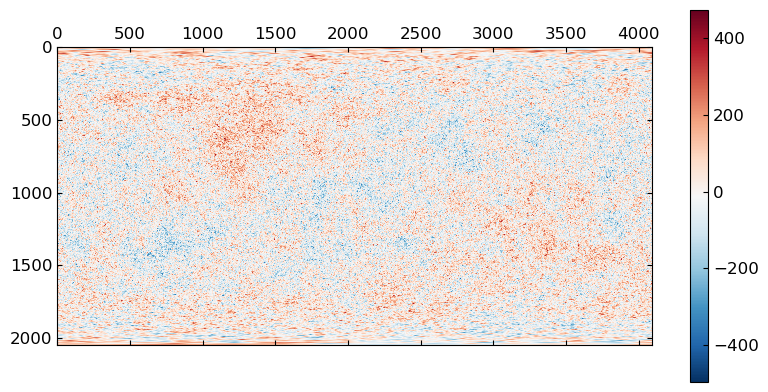

In [10]:
T[:] |> matshow; colorbar(); gcf()

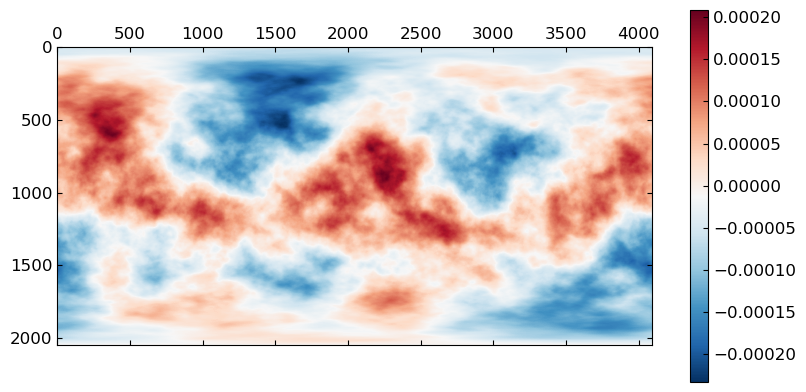

In [11]:
ϕ[:] |> matshow; colorbar(); gcf()

Equitorial belt with ArrayLense
======================================
To use ArrayLense we just need to define ∇!

In [12]:
struct Nabla!{Tθ,Tφ}
    ∂θ::Tθ
    ∂φᵀ::Tφ
end

function (∇!::Nabla!{Tθ,Tφ})(∇y::NTuple{2,A}, y::NTuple{2,A}) where {Tθ,Tφ,Tf,A<:Array{Tf,2}}
    mul!(∇y[1], ∇!.∂θ, y[1])
    mul!(∇y[2], y[2], ∇!.∂φᵀ)
    ∇y
end

function (∇!::Nabla!{Tθ,Tφ})(∇y::NTuple{2,A}, y::A) where {Tθ,Tφ,Tf,A<:Array{Tf,2}}
    ∇!(∇y, (y,y))
end

function (∇!::Nabla!{Tθ,Tφ})(y::A) where {Tθ,Tφ,Tf,A<:Array{Tf,2}}
    ∇y = (similar(y), similar(y))
    ∇!(∇y, (y,y))
    ∇y
end

Construct ∂θ (action by left mult)

 for healpix on the equitorial belt, cos(θ) is on an even grid.

using SphereTransforms.FastTransforms: chebyshevpoints
cosθ = chebyshevpoints(Float64, trn.nθ; kind=1)

In [13]:
∂θ = @sblock let trn
    onesnθm1 = fill(1,trn.nθ-1)
    ∂θ = (1 / (2Δθ(trn))) * spdiagm(-1 => .-onesnθm1, 1 => onesnθm1)
    ∂θ[1,:] .= 0
    ∂θ[end,:] .= 0
    ∂θ
end

2048×2048 SparseArrays.SparseMatrixCSC{Float64,Int64} with 4094 stored entries:
  [2   ,    1]  =  -325.949
  [1   ,    2]  =  0.0
  [3   ,    2]  =  -325.949
  [2   ,    3]  =  325.949
  [4   ,    3]  =  -325.949
  [3   ,    4]  =  325.949
  [5   ,    4]  =  -325.949
  [4   ,    5]  =  325.949
  [6   ,    5]  =  -325.949
  ⋮
  [2044, 2043]  =  -325.949
  [2043, 2044]  =  325.949
  [2045, 2044]  =  -325.949
  [2044, 2045]  =  325.949
  [2046, 2045]  =  -325.949
  [2045, 2046]  =  325.949
  [2047, 2046]  =  -325.949
  [2046, 2047]  =  325.949
  [2048, 2047]  =  0.0
  [2047, 2048]  =  325.949

Construct ∂φᵀ (action by right mult)

In [14]:
∂φᵀ = @sblock let trn
    onesnφm1 = fill(1,trn.nφ-1)
    ∂φ      = spdiagm(-1 => .-onesnφm1, 1 => onesnφm1)
    # for the periodic boundary conditions
    ∂φ[1,end] = -1
    ∂φ[end,1] =  1
    # now as a right operator
    # (∂φ * f')' == ∂/∂φ f == f * ∂φᵀ
    ∂φᵀ = transpose((1 / (2Δφ(trn))) * ∂φ);
    ∂φᵀ
end

4095×4095 LinearAlgebra.Transpose{Float64,SparseArrays.SparseMatrixCSC{Float64,Int64}}:
    0.0   -325.87     0.0      0.0   …     0.0      0.0      0.0    325.87
  325.87     0.0   -325.87     0.0         0.0      0.0      0.0      0.0
    0.0    325.87     0.0   -325.87        0.0      0.0      0.0      0.0
    0.0      0.0    325.87     0.0         0.0      0.0      0.0      0.0
    0.0      0.0      0.0    325.87        0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0   …     0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
    0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
    ⋮                                ⋱                             
    0.0      0.0      0.0      0.0         0.0      0.0      0.0      0.0
    0.0      0.0      0.0    

belt displacement field

In [15]:
### The following leads to some systematics at the edges
vϕbelt = @sblock let trn, ϕ, ∂θ, ∂φᵀ
    θ = pix(trn)[1]
    #sinθ = sin.(θ)
    #cscθ = csc.(θ) # 1/sinθ
    sin⁻²θ = 1 .+ (cot.(θ)).^2 # = cscθ^2

    ϕbelt = ϕ[:]
    ∂θϕ = ∂θ * ϕbelt
    ∂φϕ = ϕbelt * ∂φᵀ
    v1_eθφ_belt = ∂θϕ
    v2_eθφ_belt = ∂φϕ .* sin⁻²θ
    (v1_eθφ_belt, v2_eθφ_belt)
end

([0.0 0.0 … 0.0 0.0; 0.0004114481435903393 0.00041136721319229644 … 0.0004116070705135061 0.00041152809657918343; … ; 0.0011121757179743934 0.0011117360333477307 … 0.0011130459481120823 0.0011126123571509896; 0.0 0.0 … 0.0 0.0], [-0.0019233901862302555 -0.0030541986768305176 … 0.00033819436957919363 -0.0007925916567950582; -0.006640875219638153 -0.0069907826491400794 … -0.005941010075708211 -0.006290951017791001; … ; 0.1130334949266855 0.11381290167745463 … 0.11147344476481316 0.11225367487055007; 0.3024114222767548 0.3044703496068671 … 0.2982909836702606 0.30035163163756107])

Now construct the lense

In [16]:
L = @sblock let v=vϕbelt, ∂θ, ∂φᵀ,  ∇! = Nabla!(∂θ, ∂φᵀ), nsteps=16
    t₀ = 0
    t₁ = 1
    FieldLensing.ArrayLense(v, ∇!, t₀, t₁, nsteps)
end;

In [17]:
Tbelt = T[:]
@time lenTbelt = L * Tbelt

 13.339736 seconds (10.80 M allocations: 1.651 GiB, 1.40% gc time)


2048×4095 Array{Float64,2}:
  -175.367        -175.361       …    -175.379         -175.373
   -25.2626        -25.2649            -25.2604         -25.2611
    76.1821         76.0703             76.3988          76.2916
   135.703         135.939             135.224          135.465
    97.9218         98.1535             97.4604          97.6908
     1.44577         1.16        …       2.03482          1.73739
   -31.8178        -31.8734            -31.6801         -31.7534
    26.9742         26.94               27.0635          27.0153
    92.0682         91.5613             93.0639          92.5691
   109.875         108.814             111.984          110.932
     ⋮                           ⋱                   
  -227.731          48.1303            -17.6108        -148.47
 26378.5         60298.0         …  -12420.5         -29771.0
     1.16876e7      -1.00276e7          -5.54785e6        4.84811e6
    -1.75321e9      -4.2237e9            8.14639e8        2.06565e9
    -6.98

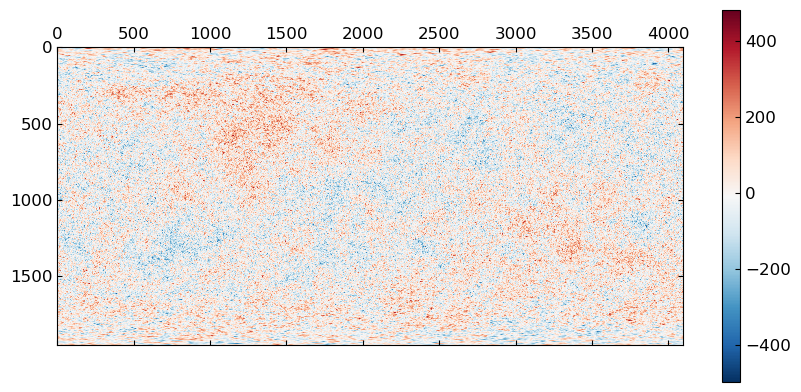

In [18]:
lenTbelt[50:end-50,:] |> matshow; colorbar(); gcf()

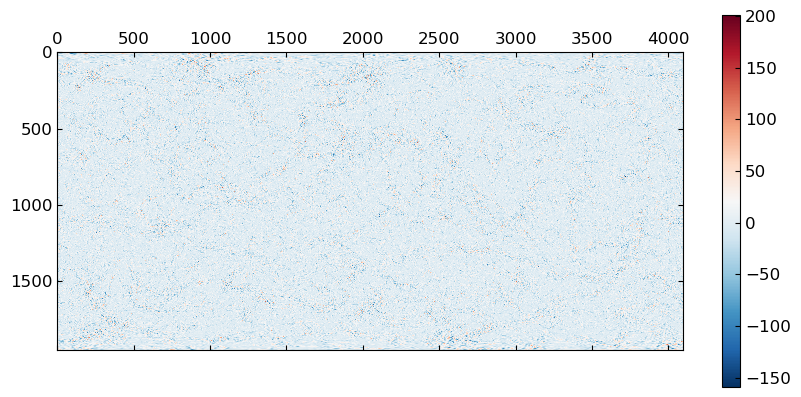

In [19]:
(lenTbelt .- Tbelt)[50:end-50,:] |> matshow; colorbar(); gcf()

### Inverse Lense

In [20]:
@time Tbelt′ = L \ lenTbelt

  8.440266 seconds (7.90 k allocations: 1.125 GiB)


2048×4095 Array{Float64,2}:
 -175.339       -175.317       -175.295       …  -175.384       -175.361
  -56.1652       -56.1437       -56.123           -56.2109       -56.1876
   57.1937        57.0364        56.8764           57.5002        57.3483
  135.336        135.531        135.723           134.934        135.137
  107.052        107.298        107.543           106.561        106.807
    1.2891         1.06801        0.853318    …     1.7503         1.51654
  -32.2484       -32.2195       -32.1833          -32.2839       -32.27
   26.5765        26.5834        26.5956           26.5794        26.5751
   90.1899        89.6511        89.1069           91.2513        90.7233
  106.957        105.929        104.899           109.007        107.984
    ⋮                                         ⋱                 
    1.72094e37    -2.46439e37    -7.14933e37       -3.84032e36     8.00004e36
   -8.80339e39    -2.47435e40     2.30304e40  …     2.74825e39     5.8071e39
   -8.17088e42   

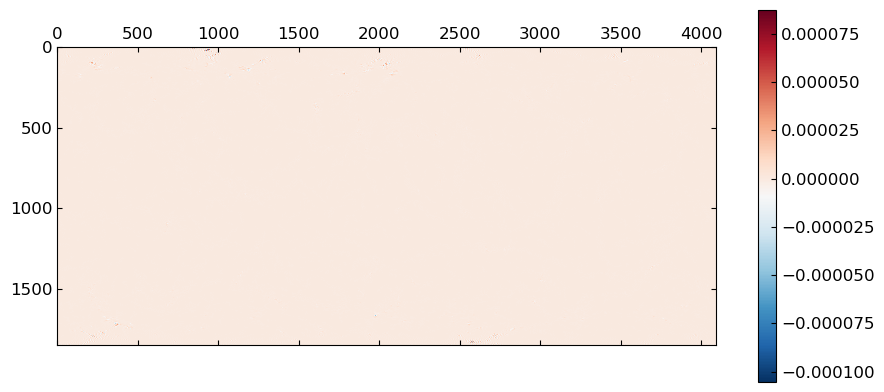

In [21]:
(Tbelt′ .- Tbelt)[100:end-100,:] |> matshow; colorbar(); gcf()

In [22]:
@benchmark $L * $T

BenchmarkTools.Trial: 
  memory estimate:  1.37 GiB
  allocs estimate:  922
  --------------
  minimum time:     9.575 s (0.36% GC)
  median time:      9.575 s (0.36% GC)
  mean time:        9.575 s (0.36% GC)
  maximum time:     9.575 s (0.36% GC)
  --------------
  samples:          1
  evals/sample:     1

FFT in azimuth with ArrayLense
======================================
To use ArrayLense we just need to define ∇!

In [23]:
struct Nabla!′{Tθ,T1φ,T2φ,T3φ}
    ∂θ::Tθ
    planFFT::T1φ
    ikφ::T2φ
    ak::T3φ
end

function (∇!::Nabla!′{Tθ,T1φ,T2φ,T3φ})(∇y::NTuple{2,A}, y::NTuple{2,A}) where {Tθ,T1φ,T2φ,T3φ,Tf,A<:Array{Tf,2}}
    mul!(∇y[1], ∇!.∂θ, y[1])

    mul!(∇!.ak, ∇!.planFFT.unscaled_forward_transform, y[2])
    @inbounds @. ∇!.ak = ∇!.ak * ∇!.ikφ * ∇!.planFFT.scale_forward * ∇!.planFFT.scale_inverse
    mul!(∇y[2], ∇!.planFFT.unscaled_inverse_transform, ∇!.ak)
    ∇y
end

function (∇!::Nabla!′{Tθ,T1φ,T2φ,T3φ})(∇y::NTuple{2,A}, y::A) where {Tθ,T1φ,T2φ,T3φ,Tf,A<:Array{Tf,2}}
    ∇!(∇y, (y,y))
end

function (∇!::Nabla!′{Tθ,T1φ,T2φ,T3φ})(y::A) where {Tθ,T1φ,T2φ,T3φ,Tf,A<:Array{Tf,2}}
    ∇y = (similar(y), similar(y))
    ∇!(∇y, (y,y))
    ∇y
end

In [24]:
𝕨     = 𝕀(trn.nθ) ⊗ r𝕎(trn.nφ, 2π)
plan𝕨 = FFTransforms.plan(𝕨)
kφ    = FFTransforms.freq(𝕨)[2]' |> Array
ak    = zeros(eltype_out(𝕨), size_out(𝕨))
∇!′   = Nabla!′(∂θ, plan𝕨, im .* kφ, ak)

Main.##254.Nabla!′{SparseArrays.SparseMatrixCSC{Float64,Int64},FFTransforms.FFTplan{Float64,2,Complex{Float64},Bool,Float64,FFTW.rFFTWPlan{Float64,-1,false,2,Tuple{Int64}},FFTW.rFFTWPlan{Complex{Float64},1,false,2,Tuple{Int64}}},Array{Complex{Float64},2},Array{Complex{Float64},2}}(
  [2   ,    1]  =  -325.949
  [1   ,    2]  =  0.0
  [3   ,    2]  =  -325.949
  [2   ,    3]  =  325.949
  [4   ,    3]  =  -325.949
  [3   ,    4]  =  325.949
  [5   ,    4]  =  -325.949
  [4   ,    5]  =  325.949
  [6   ,    5]  =  -325.949
  ⋮
  [2044, 2043]  =  -325.949
  [2043, 2044]  =  325.949
  [2045, 2044]  =  -325.949
  [2044, 2045]  =  325.949
  [2046, 2045]  =  -325.949
  [2045, 2046]  =  325.949
  [2047, 2046]  =  -325.949
  [2046, 2047]  =  325.949
  [2048, 2047]  =  0.0
  [2047, 2048]  =  325.949, FFTransforms.FFTplan{Float64,2,Complex{Float64},Bool,Float64,FFTW.rFFTWPlan{Float64,-1,false,2,Tuple{Int64}},FFTW.rFFTWPlan{Complex{Float64},1,false,2,Tuple{Int64}}}(FFTW real-to-complex plan for 20

In [25]:
vϕbelt′ = @sblock let ∇!′, trn, ϕ
    θ = pix(trn)[1]
    sin⁻²θ = 1 .+ (cot.(θ)).^2 # = cscθ^2

    ϕbelt = ϕ[:]
    vϕ′ = ∇!′(ϕbelt)
    (vϕ′[1], vϕ′[2] .* sin⁻²θ)
end

([0.0 0.0 … 0.0 0.0; 0.0004114481435903393 0.00041136721319229644 … 0.0004116070705135061 0.00041152809657918343; … ; 0.0011121757179743934 0.0011117360333477307 … 0.0011130459481120823 0.0011126123571509896; 0.0 0.0 … 0.0 0.0], [-0.0019233885191077662 -0.0030541974739035065 … 0.0003381969142667398 -0.0007925895898589389; -0.0066408780101092305 -0.006990785450971145 … -0.005941012857251125 -0.006290953813464552; … ; 0.11303356381173664 0.11381297110339408 … 0.11147351256325584 0.11225374321216001; 0.3024115661608272 0.30447049448421226 … 0.29829112555506526 0.30035177452892337])

Now construct the lense

In [26]:
L′ = @sblock let v=vϕbelt′, ∇!′, nsteps=16
    t₀ = 0
    t₁ = 1
    FieldLensing.ArrayLense(v, ∇!′, t₀, t₁, nsteps)
end;

In [27]:
Tbelt = T[:]
@time lenTbelt′ = L′ * Tbelt

 16.220131 seconds (3.28 M allocations: 1.372 GiB, 1.09% gc time)


2048×4095 Array{Float64,2}:
  2.90788e88   -4.60585e88    6.29534e88   …  -5.13918e87   -1.20133e88
  2.58485e84   -3.21506e84    3.83703e84       1.29977e84   -1.94642e84
 -4.45227e80    5.12806e80   -5.79915e80      -3.0865e80     3.77176e80
 -2.85739e76    2.92524e76   -2.99139e76      -2.71652e76    2.78782e76
  1.08503e72   -1.14185e72    1.19763e72       9.68229e71   -1.02716e72
  3.79489e67   -3.77777e67    3.76044e67   …   3.82844e67   -3.81178e67
 -3.34631e62    3.35716e62   -3.36703e62      -3.32155e62    3.33445e62
 -6.62523e58    6.61424e58   -6.6033e58       -6.64733e58    6.63626e58
 -2.06278e54    2.0513e54    -2.03979e54      -2.08567e54    2.07424e54
  2.76439e50   -2.72549e50    2.68651e50       2.84191e50   -2.80319e50
  ⋮                                        ⋱                
 -1.92886e76    1.97356e76   -2.01848e76      -1.84016e76    1.8844e76
  9.85204e82   -9.8926e82     9.93274e82   …   9.76962e82   -9.81104e82
 -1.86227e88    1.87058e88   -1.8788e88       -1

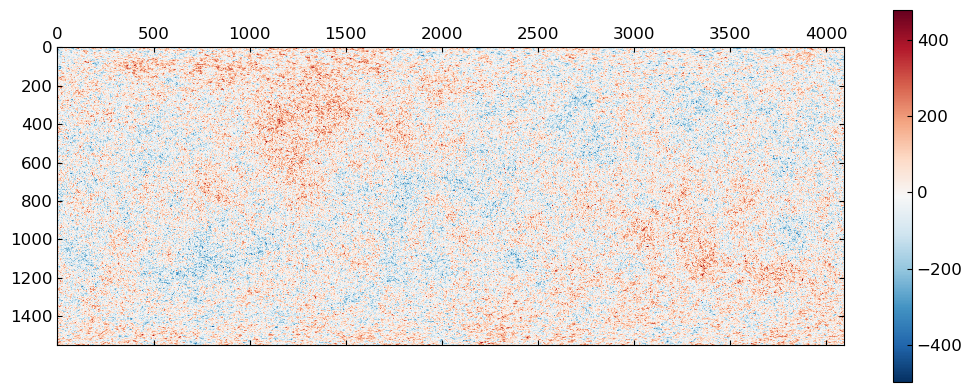

In [28]:
lenTbelt′[250:end-250,:] |> matshow; colorbar(); gcf()

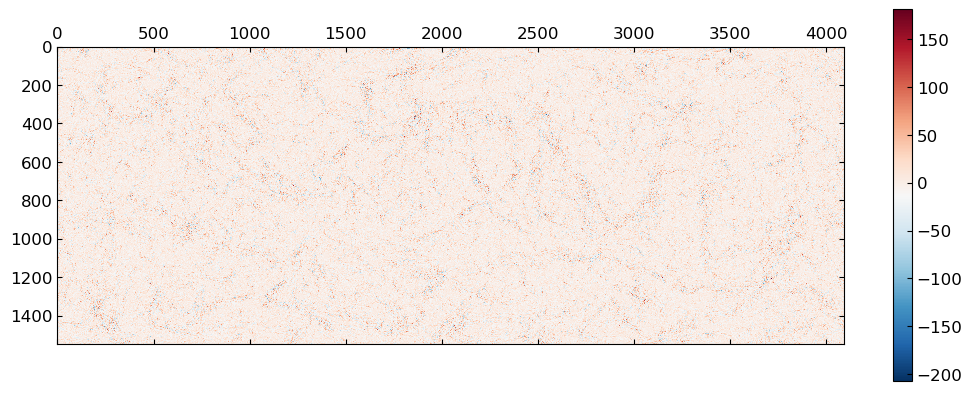

In [29]:
(Tbelt - lenTbelt′)[250:end-250,:] |> matshow; colorbar(); gcf()

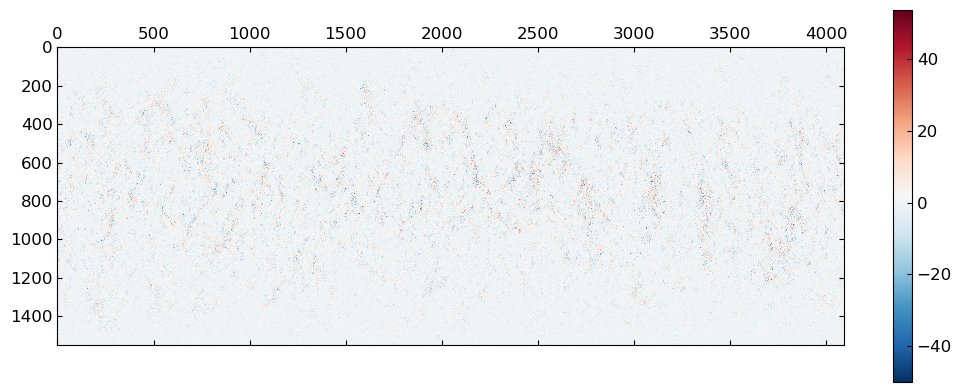

In [30]:
(lenTbelt - lenTbelt′)[250:end-250,:] |> matshow; colorbar(); gcf()

In [31]:
@time Tbelt′′ = L′ \ lenTbelt′

 15.670439 seconds (2.37 M allocations: 1.334 GiB, 0.83% gc time)


2048×4095 Array{Float64,2}:
 -1.42366e194   2.25479e194  -3.08159e194  …   2.51632e193   5.88188e193
 -2.45469e190   2.36566e190  -2.27599e190     -2.63082e190   2.54308e190
  1.2994e187   -1.39393e187   1.48791e187      1.10864e187  -1.2043e187
  1.39977e183  -1.41416e183   1.42835e183      1.37041e183  -1.38519e183
 -6.25348e177   7.71057e177  -9.14622e177     -3.27413e177   4.77473e177
 -4.94799e174   4.95311e174  -4.95787e174  …  -4.93659e174   4.94248e174
  1.36771e170  -1.37013e170   1.37244e170      1.36258e170  -1.3652e170
  6.28659e166  -6.27649e166   6.26638e166      6.30675e166  -6.29668e166
 -1.64358e162   1.63408e162  -1.62456e162     -1.66253e162   1.65306e162
 -4.66669e158   4.60091e158  -4.53497e158     -4.79783e158   4.73232e158
  ⋮                                        ⋱                
  8.76243e226  -8.81669e226   8.87077e226      8.65342e226  -8.70801e226
 -1.98645e231   1.99374e231  -2.00093e231  …  -1.97155e231   1.97905e231
 -4.28708e234   4.32091e234  -4.3548e

See how well forward, then backward lensing (with fft in azimuth) does
for recovering the original field

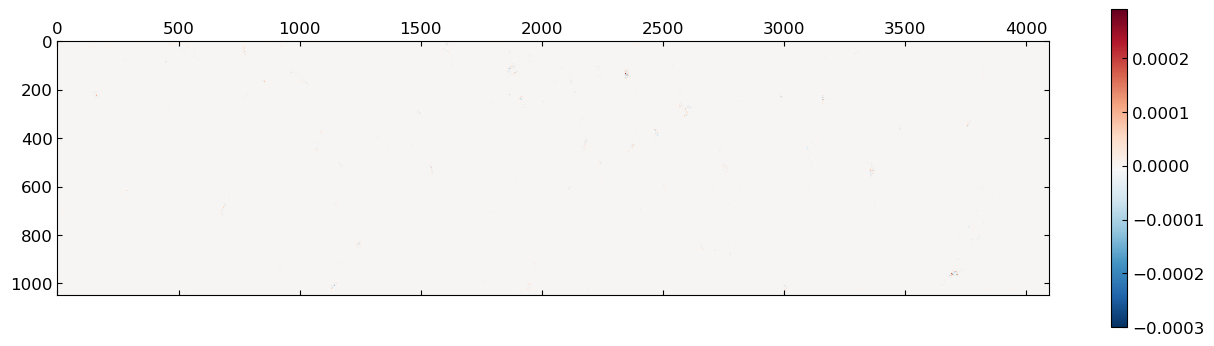

In [32]:
(Tbelt′′ - Tbelt)[500:end-500,:] |> matshow; colorbar(); gcf()

Compare with how well the map space operator does

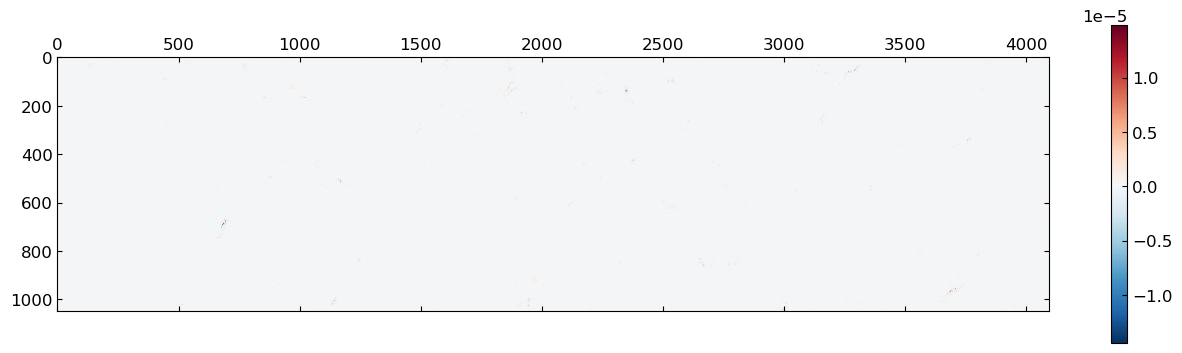

In [33]:
(Tbelt′ - Tbelt)[500:end-500,:] |> matshow; colorbar(); gcf()